In [2]:
import zipfile

# Extract the archive
local_zip = './data/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp/rps-train')
zip_ref.close()

local_zip = './data/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp/rps-test')
zip_ref.close()

In [3]:
import os

base_dir = './tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-109.png', 'rock01-013.png', 'rock03-077.png', 'rock05ck01-113.png', 'rock04-099.png', 'rock01-047.png', 'rock05ck01-085.png', 'rock06ck02-098.png', 'rock05ck01-042.png', 'rock01-116.png']
['paper07-113.png', 'paper01-002.png', 'paper06-079.png', 'paper02-104.png', 'paper01-097.png', 'paper06-082.png', 'paper01-098.png', 'paper05-090.png', 'paper07-077.png', 'paper01-114.png']
['scissors04-041.png', 'testscissors03-072.png', 'scissors02-047.png', 'testscissors03-082.png', 'scissors03-015.png', 'scissors02-076.png', 'testscissors02-117.png', 'testscissors03-024.png', 'testscissors03-079.png', 'testscissors01-055.png']


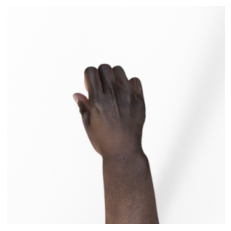

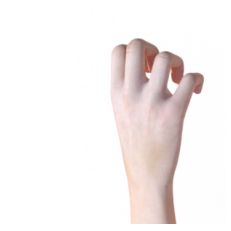

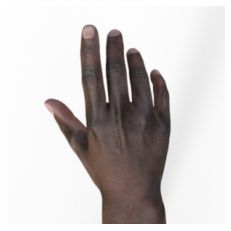

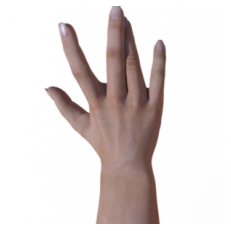

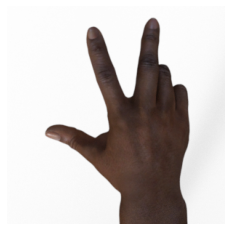

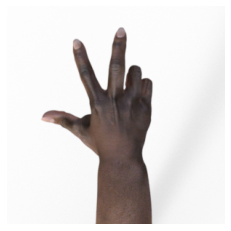

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
             for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
              for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                 for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2022-03-24 08:13:28.890979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 08:13:28.956956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 08:13:28.957100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 08:13:28.958343: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "./tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=64
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [12]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/50
20/20 [==============================] - 7s 334ms/step - loss: 1.0898 - accuracy: 0.3871 - val_loss: 2.0195 - val_accuracy: 0.3594
Epoch 2/50
20/20 [==============================] - 7s 337ms/step - loss: 1.1443 - accuracy: 0.3855 - val_loss: 1.0530 - val_accuracy: 0.4531
Epoch 3/50
20/20 [==============================] - 7s 339ms/step - loss: 1.0597 - accuracy: 0.4734 - val_loss: 0.6735 - val_accuracy: 0.7344
Epoch 4/50
20/20 [==============================] - 7s 332ms/step - loss: 1.0828 - accuracy: 0.5839 - val_loss: 0.5793 - val_accuracy: 0.7604
Epoch 5/50
20/20 [==============================] - 7s 345ms/step - loss: 0.7521 - accuracy: 0.6586 - val_loss: 0.3538 - val_accuracy: 0.9740
Epoch 6/50
20/20 [==============================] - 7s 343ms/step - loss: 0.7395 - accuracy: 0.6758 - val_loss: 0.2484 - val_accuracy: 0.9792
Epoch 7/50
20/20 [==============================] - 7s 332ms/step - loss: 0.6361 - accuracy: 0.7395 - val_loss: 0.2557 - val_accuracy: 0.9323
Epoch 

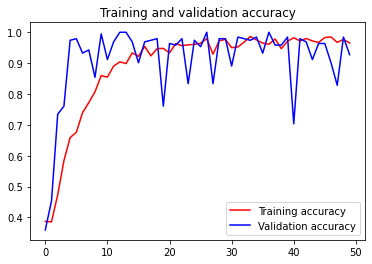

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()